In [20]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline


0 %
> /Users/sandesh/quantum-ml/ndot/lib/markov_graph.py(269)get_current()
-> return current
(Pdb) c


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:37: ComplexWarning: Casting complex values to real discards the imaginary part


> /Users/sandesh/quantum-ml/ndot/lib/markov_graph.py(269)get_current()
-> return current
(Pdb) b 269
Breakpoint 2 at /Users/sandesh/quantum-ml/ndot/lib/markov_graph.py:269
(Pdb) c
> /Users/sandesh/quantum-ml/ndot/lib/markov_graph.py(269)get_current()
-> return current
(Pdb) cl 269
No breakpoint numbered 269
(Pdb) cl 1
Deleted breakpoint 1
(Pdb) cl 2
Deleted breakpoint 2
(Pdb) c
10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
# of nodes : 96
885.787301064 seconds


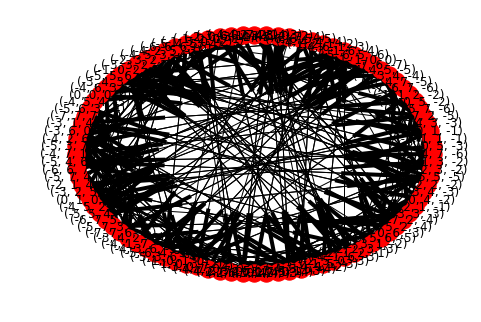

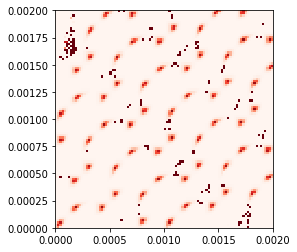

In [158]:
import dot_classifier
reload(dot_classifier)
import thomas_fermi
reload(thomas_fermi)
import markov_graph
reload(markov_graph)
import time
st = time.time()

N_v_points = 100
V_d_vec = np.linspace(0e-3,2e-3,N_v_points)
I_vec = np.zeros((N_v_points,N_v_points))

x = 2*np.arange(4)
K = thomas_fermi.create_K_matrix(x,E_scale=0.5e-3)

graph_model = (7,1)
battery_weight = 1000
kT = 10e-6
mu_l = (10e-3+0.1e-3,10e-3)

battery_ind = []
for i in range(N_v_points):
    if(int(i*100/N_v_points) % 10 == 0):
        print int(i*100/N_v_points),"%"
    for j in range(N_v_points):
        V = np.array([5e-3,V_d_vec[i],V_d_vec[j],5e-3])
            
        physics = (x,V,K,mu_l,battery_weight,kT)
        # generate graph only on first call
        if (i==0 and j==0):
            G = markov_graph.generate_graph(graph_model, physics)
            battery_ind = markov_graph.get_battery_nodes(G)
        else:
            G = markov_graph.recalculate_weights(G,physics)  
            
        I_vec[i,j] = markov_graph.get_current(G,battery_ind)

print "# of nodes :",len(list(G.nodes(data=True)))
#print G.edges(data=True)

plt.figure(1)
nx.draw_shell(G,with_labels=True)

plt.figure(2)
plt.imshow(I_vec,vmin=0,vmax=1e-4,interpolation="none",\
           cmap=plt.get_cmap('Reds'),origin='lower',extent=\
           [V_d_vec[0],V_d_vec[-1],V_d_vec[0],V_d_vec[-1]])

print time.time() - st,"seconds"

In [139]:
I_vec[90,24]

-0.00049267588642894027

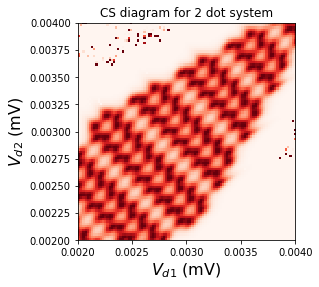

In [124]:
plt.imshow(I_vec,vmin=0,vmax=9e-5,interpolation="none",\
           cmap=plt.get_cmap('Reds'),origin='lower',extent=\
           [V_d_vec[0],V_d_vec[-1],V_d_vec[0],V_d_vec[-1]])
plt.xlabel(r'$V_{d1}$ (mV)',fontsize=16)
plt.ylabel(r'$V_{d2}$ (mV)',fontsize=16)
plt.title('CS diagram for 2 dot system')

In [102]:
I_vec[0,0]

0.20016587253634968

In [105]:
I_vec[10,10]

0.33323792702784272

In [123]:
for i in range(100):
    for j in range(100):
        if I_vec[i,j] > 1e-3:
            I_vec[i,j] = 0
            

In [141]:
VV_d_vec[24]

0.0032424242424242424

In [157]:
import pdb
import thomas_fermi
reload(thomas_fermi)
import markov_graph
reload(markov_graph)
V = np.array([5e-3,V_d_vec[90],V_d_vec[24],5e-3])
physics = (x,V,K,mu_l,battery_weight,kT)
G = markov_graph.generate_graph(graph_model, physics)
battery_ind = markov_graph.get_battery_nodes(G)
curr = markov_graph.get_current(G,battery_ind)
print cur

> /Users/sandesh/quantum-ml/ndot/lib/markov_graph.py(258)get_current()
-> ind = np.argwhere(np.abs(w) < 1e-1).flatten()[0]
(Pdb) print len(v)
160
(Pdb) print np.min(np.abs(v))
1.85814311817e-199
(Pdb) print np.min(v)
(-0.998422857526+0j)
(Pdb) n
> /Users/sandesh/quantum-ml/ndot/lib/markov_graph.py(261)get_current()
-> dist = v[:,ind]/v[:,ind].sum(axis=0)
(Pdb) print ind
0
(Pdb) v[0]
matrix([[ -4.28821611e-19 +0.00000000e+00j,
          -3.34197457e-19 +0.00000000e+00j,
          -2.37916520e-11 +0.00000000e+00j,
           3.48476173e-07 +0.00000000e+00j,
           3.11798154e-13 +0.00000000e+00j,
          -1.34616227e-06 +0.00000000e+00j,
          -1.73125923e-06 +0.00000000e+00j,
          -1.27535474e-06 +0.00000000e+00j,
           5.94056014e-08 +0.00000000e+00j,
           1.20628526e-05 +0.00000000e+00j,
          -9.93742290e-10 -3.44994075e-10j,
          -9.93742290e-10 +3.44994075e-10j,
          -7.36614471e-10 -4.61292515e-11j,
          -7.36614471e-10 +4.61292515e-11j

NameError: name 'cur' is not defined

In [ ]:
print np.max(np.dot(M,v[:,ind]))